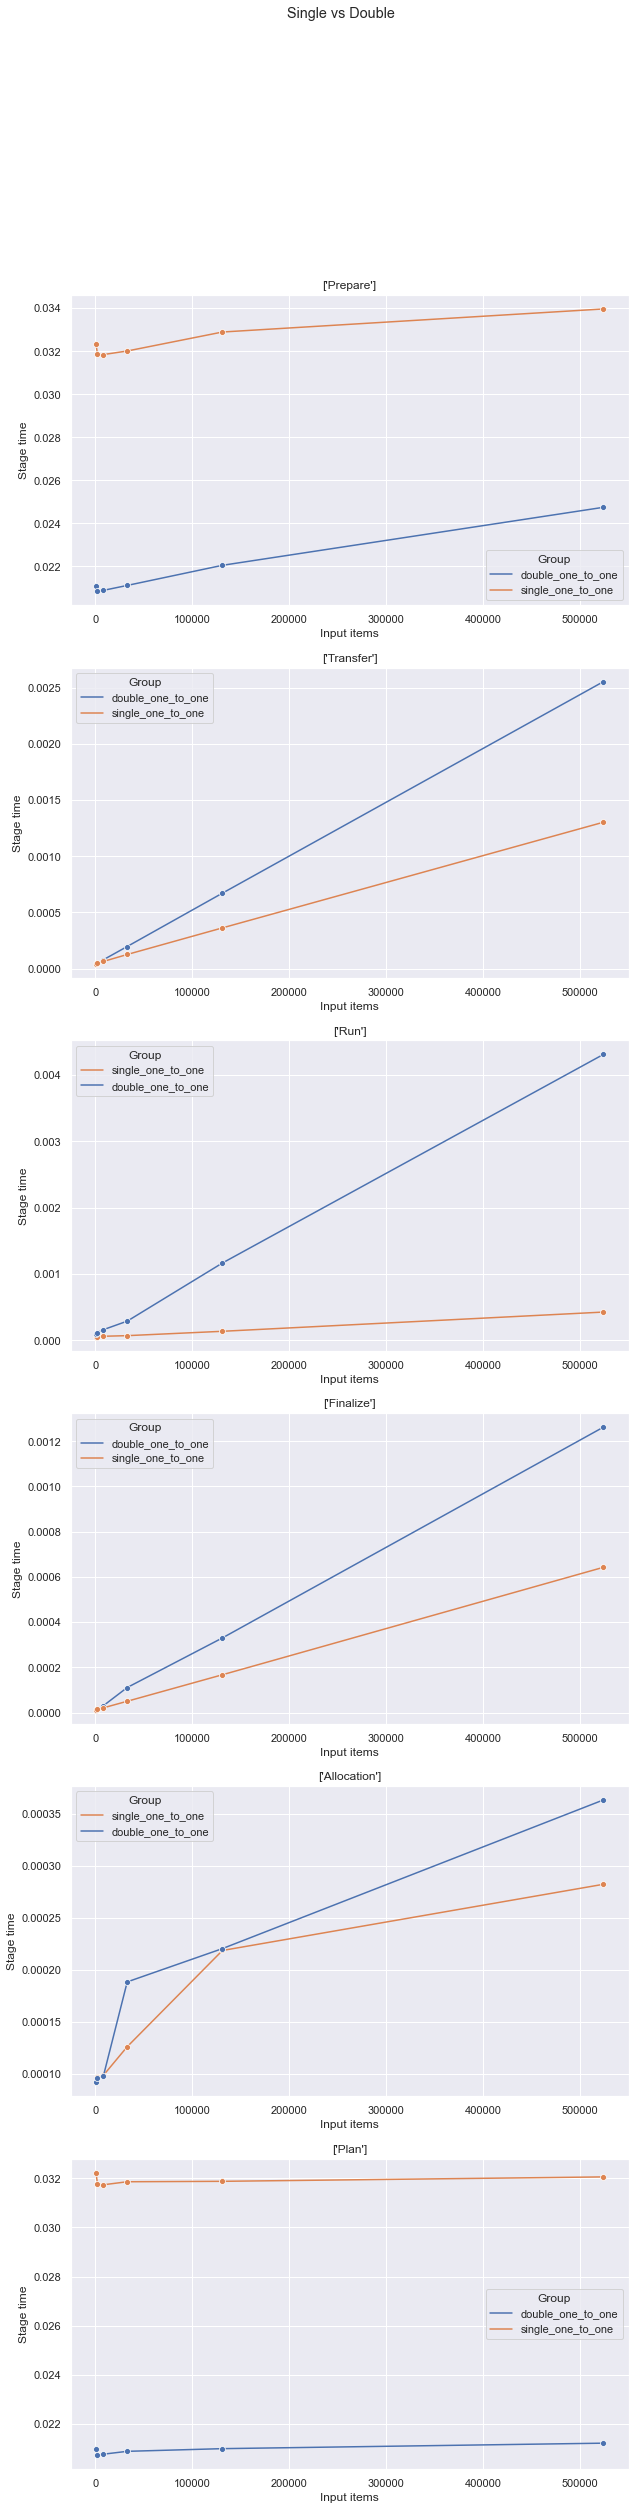

In [14]:
import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from shared import Benchmark, Run, Group

from pathlib import Path
from typing import List, Tuple, Dict, Any

sns.set(rc={'figure.figsize':(10,40)})

all_stages = ["Load", "Prepare", "Transfer", "Run", "Finalize"]
compute_stages = ["Prepare", "Transfer", "Run", "Finalize"]

def plot_stages(ax: plt.axes, data: pd.DataFrame, stages: List[str], palette: Dict[str, Any]):
    run_times = data.groupby(["Group", "Input items"])[stages].apply(lambda x: x.mean().sum() / 1e9).reset_index(name="Stage time").sort_values("Stage time")

    ax = sns.lineplot(data=run_times, x="Input items", y="Stage time", hue="Group", ax=ax, palette=palette, marker="o")
    ax.set_title(str(stages))


benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "test" / "fft")

stage_groups = [["Prepare"], ["Transfer"], ["Run"], ["Finalize"], ["Allocation"], ["Plan"]]

fig, axs = plt.subplots(nrows=len(stage_groups))
fig.suptitle(f"Single vs Double")

one_to_one_groups = ["single_one_to_one", "double_one_to_one"]

data = pd.concat([run.data for run in itertools.chain.from_iterable([benchmark.groups[group_name].runs for group_name in one_to_one_groups])], join="inner")

names = sorted(data["Group"].unique())
palette = dict(zip(names, sns.color_palette(n_colors=len(names))))

for idx, stage_group in enumerate(stage_groups):
    plot_stages(axs[idx], data, stage_group, palette)


